In [1]:
from shapely import Point , LineString , LinearRing , Polygon , MultiPoint , MultiLineString , MultiPolygon

# validation.explain_validity(ob):

### 返回阐明该对象有效性或无效性的一个字符串。

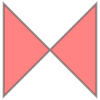

In [2]:
coords = [(0, 0), (0, 2), (1, 1), (2, 2), (2, 0), (1, 1), (0, 0)]

p = Polygon(coords)
p

In [3]:
from shapely.validation import explain_validity

explain_validity(p)

'Ring Self-intersection[1 1]'

# validation.make_valid(ob)

### 如果是无效的，返回一个有效的几何对象。如果是有效的，将返回输入的几何对象自身。

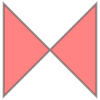

In [4]:
from shapely.validation import make_valid

coords = [(0, 0), (0, 2), (1, 1), (2, 2), (2, 0), (1, 1), (0, 0)]
p = Polygon(coords)
p

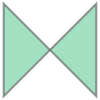

In [5]:
make_valid(p)

In [6]:
list(make_valid(p).geoms)

[<POLYGON ((1 1, 0 0, 0 2, 1 1))>, <POLYGON ((2 0, 1 1, 2 2, 2 0))>]

<AxesSubplot:>

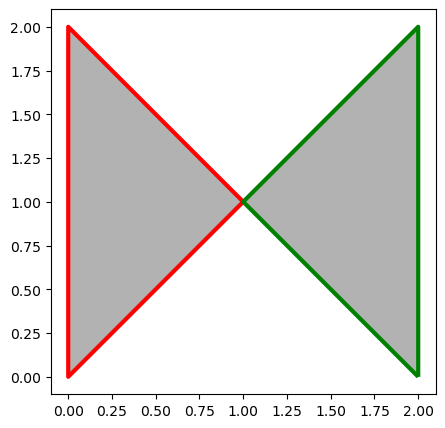

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt

f,ax = plt.subplots(figsize=(5,5))

gpd.GeoDataFrame([p] , columns=["geometry"]).plot(ax=ax , facecolor="k", alpha=0.3)
gpd.GeoDataFrame([make_valid(p).geoms[0]] , columns=["geometry"]).plot(ax=ax , facecolor="none", edgecolor="red" , lw=3)
gpd.GeoDataFrame([make_valid(p).geoms[1]] , columns=["geometry"]).plot(ax=ax , facecolor="none", edgecolor="green" , lw=3)

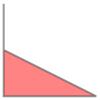

In [8]:
coords = [(0, 2), (0, 1), (2, 0), (0, 0), (0, 2)]
p = Polygon(coords)
p

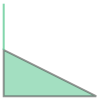

In [9]:
# 几何对象被分割成不同类型的两个部分
make_valid(p)

In [10]:
list(make_valid(p).geoms)

[<POLYGON ((2 0, 0 0, 0 1, 2 0))>, <LINESTRING (0 2, 0 1)>]

<AxesSubplot:>

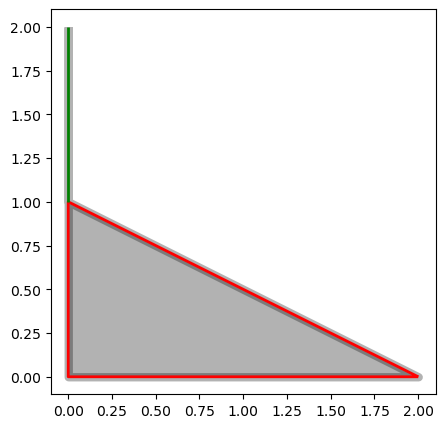

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt

f,ax = plt.subplots(figsize=(5,5))

gpd.GeoDataFrame([p] , columns=["geometry"]).plot(ax=ax , facecolor="k" , edgecolor="k", alpha=0.3 , lw=6)
gpd.GeoDataFrame([make_valid(p).geoms[0]] , columns=["geometry"]).plot(ax=ax , facecolor="none", edgecolor="red" , lw=2)
gpd.GeoDataFrame([make_valid(p).geoms[1]] , columns=["geometry"]).plot(ax=ax , facecolor="none", edgecolor="green" , lw=2)